[View in Colaboratory](https://colab.research.google.com/github/rdenadai/Image-Study-Notebooks/blob/master/notebooks/madelbrot.ipynb)

## Mandelbrot


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

np.warnings.filterwarnings('ignore')

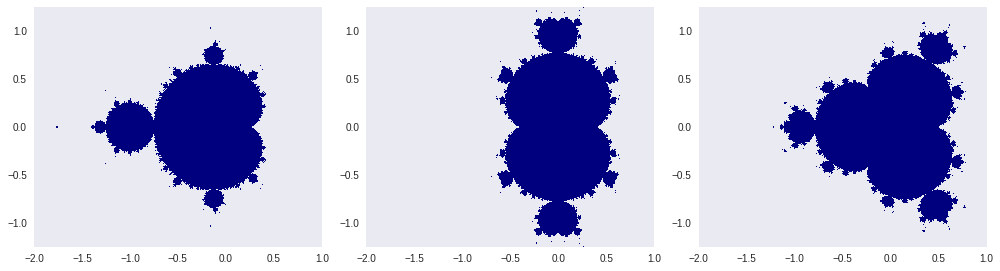

In [7]:
k1, k2, p1, p2 = -2, 1, -1.25, 1.25
# k1, k2, p1, p2 = -0.8, -0.7, 0, 0.1

N = 1024
x, y = np.linspace(k1, k2, N), np.linspace(p1, p2, N)
c = x[:, np.newaxis] + (y[np.newaxis, :] * 1j)
z = c

mandelbrot = []
for i in [2, 3, 4]:
    for _ in range(80):
        z = z**i + c
    mandelbrot.append(np.abs(z))
    z = c

plt.figure(figsize=(14, 14))
for i, mandel in enumerate(mandelbrot):
    plt.subplot(3, 3, i+1)
    plt.imshow(mandel.T, extent=[k1, k2, p1, p2], cmap='jet')
    plt.grid(False)
plt.tight_layout()
plt.show()

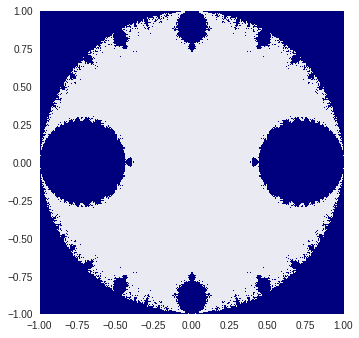

In [8]:
N = 1024
x, y = np.linspace(-1, 1, N), np.linspace(-1, 1, N)
c = x[:, np.newaxis] + (y[np.newaxis, :] * 1j)
z = c
for _ in range(80):
    z = np.sin(z/c)
mandelbrot = np.abs(z)

plt.figure(figsize=(5, 5))
plt.imshow(mandelbrot.T, extent=[-1, 1, -1, 1], cmap='jet')
plt.grid(False)
plt.tight_layout()
plt.show()

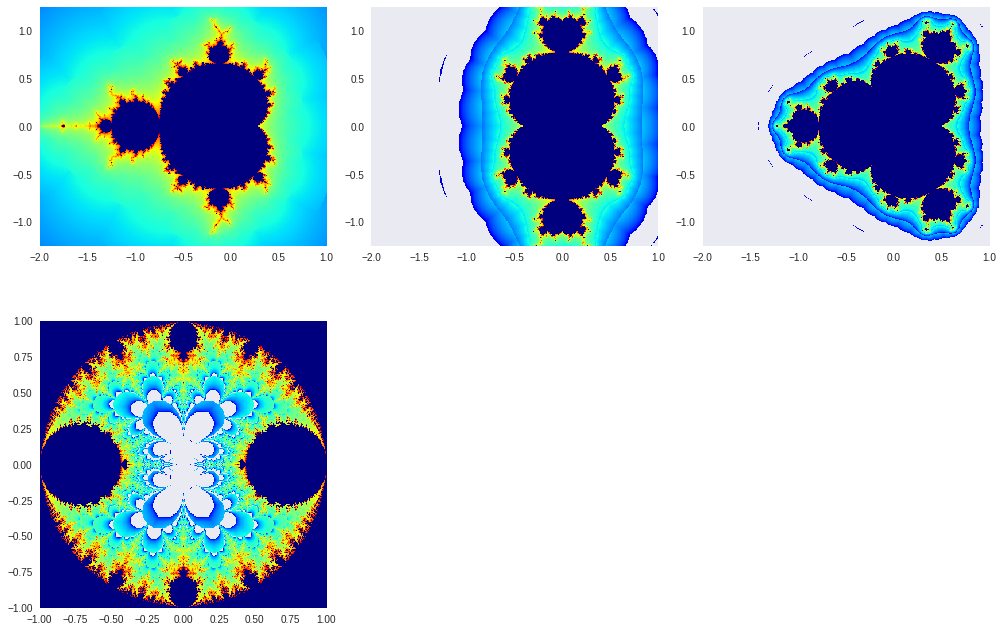

In [141]:
def mandelbrot(size=2, maxiter=100):
    N = 500
    x, y = np.linspace(-2, 1, N), np.linspace(-1.25, 1.25, N) * 1j
    
    def mandelbrot_set(c, maxiter):
        z = c
        for n in range(maxiter):
            if np.abs(z) > maxiter:
                return n - np.log(np.log(z)) / np.log(2)
            z = z**size + c
        return 0

    ms = np.empty([N, N])
    for k in range(0, x.size):
        for l in range(0, x.size):
            ms[k, l] = mandelbrot_set(x[k] + y[l], maxiter)
    return ms**.3

def mandelbrot_sine(maxiter=100):
    N = 500
    x, y = np.linspace(-1, 1, N), np.linspace(-1, 1, N) * 1j
    
    def mandelbrot_set(c, maxiter):
        z = c
        for n in range(maxiter):
            if np.abs(z) > maxiter:
                return n - np.log(np.log(z)) / np.log(2)
            z = np.sin(z/c)
        return 0

    ms = np.empty([N, N])
    for k in range(0, x.size):
        for l in range(0, x.size):
            ms[k, l] = mandelbrot_set(x[k] + y[l], maxiter)
    return ms**.3

plt.figure(figsize=(14, 14))
for i, size in enumerate(range(2, 5)):
    mandel = mandelbrot(size, 50)
    plt.subplot(3, 3, i+1)
    plt.imshow(mandel.T, extent=[-2, 1, -1.25, 1.25], cmap='jet')
    plt.grid(False)

mbss = mandelbrot_sine(50)
plt.subplot(3, 3, 4)
plt.imshow(mbss.T, extent=[-1, 1, -1, 1], cmap='jet')
plt.grid(False)

plt.tight_layout()
plt.show()

In [140]:
%timeit mandelbrot(2, 50)

%timeit mandelbrot_sine(50)

1 loop, best of 3: 2.93 s per loop
1 loop, best of 3: 28.4 s per loop
